# Introducing Pandas

### Access a Website and Download a Data File (write to current directory)

In [25]:
from urllib.request import urlopen

######  Go to Zillow and download the comma separated file (CSV) for the summary data on the Zillow Home Value Index (ZHVI) for Metro Areas

In [26]:
url = 'http://files.zillowstatic.com/research/public/Metro/'

In [27]:
filename = 'Metro_Zhvi_Summary_AllHomes.csv'

In [28]:
downloaded = urlopen(url+filename)

In [29]:
 with open(filename,'wb') as zf:
        zf.write(downloaded.read())

###### Explore the data structure using Pandas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
data = pd.read_csv(filename)

In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
data.shape

(539, 16)

In [34]:
data.columns

Index(['RegionID', 'Date', 'RegionName', 'State', 'SizeRank', 'Zhvi', 'MoM',
       'QoQ', 'YoY', '5Year', '10Year', 'PeakMonth', 'PeakQuarter', 'PeakZHVI',
       'PctFallFromPeak', 'LastTimeAtCurrZHVI'],
      dtype='object')

In [35]:
data.head()

,RegionID,Date,RegionName,State,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,102001,2015-12-31,United States,NaN,0,183500,0.002185,0.009351,0.040249,0.028302,-0.002738,2007-05,2007-Q2,196100,-0.064253,2005-09
1,394913,2015-12-31,"New York, NY",NY,1,381200,0.003158,0.006602,0.017619,0.010108,-0.012885,2006-09,2006-Q3,446000,-0.145291,2004-10
2,753899,2015-12-31,"Los Angeles-Long Beach-Anaheim, CA",CA,2,554700,0.003800,0.011488,0.060612,0.059504,-0.006847,2006-07,2006-Q3,610600,-0.091549,2005-07
3,394463,2015-12-31,"Chicago, IL",IL,3,193000,0.002077,0.006781,0.026050,0.005370,-0.020781,2007-03,2007-Q1,245800,-0.214809,2002-11
4,394514,2015-12-31,"Dallas-Fort Worth, TX",TX,4,177200,0.006818,0.022504,0.140283,0.062279,0.022105,2015-12,2015-Q4,177200,0.000000,2015-12


###### First Row in Dataframe

In [36]:
data[:1]

,RegionID,Date,RegionName,State,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,102001,2015-12-31,United States,NaN,0,183500,0.002185,0.009351,0.040249,0.028302,-0.002738,2007-05,2007-Q2,196100,-0.064253,2005-09


###### Last Row in Dataframe

In [37]:
data[-1:]

,RegionID,Date,RegionName,State,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
538,394743,2015-12-31,"Ketchikan, AK",AK,538,229000,-0.006938,-0.032531,-0.019272,0.004156,NaN,2015-04,2015-Q2,241800,-0.052936,2014-11


###### 33rd Row in Dataframe

In [38]:
data[33:34]

,RegionID,Date,RegionName,State,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
33,394705,2015-12-31,"Indianapolis, IN",IN,33,130100,0.002311,0.00931,0.036653,0.017996,-0.004425,2003-11,2003-Q4,139900,-0.07005,NaN


###### Sometimes you simply want to see a subset of the data, so you perform the subsetting using boolean indexing

In [39]:
results = data[(data.State == 'WI') & (data.Zhvi > 100000)]

In [40]:
results['RegionName']

39       Milwaukee, WI
85         Madison, WI
150      Green Bay, WI
187       Appleton, WI
210         Racine, WI
228        Oshkosh, WI
233     Eau Claire, WI
273         Wausau, WI
274      La Crosse, WI
294      Sheboygan, WI
318     Whitewater, WI
319    Fond du Lac, WI
348     Beaver Dam, WI
354      Watertown, WI
361      Manitowoc, WI
401        Baraboo, WI
Name: RegionName, dtype: object

###### Now read a data set directrly from a website, without saving it to a directory (you can if you like using the technique above). This data does not have a header so you need to define the column titles separately. Sometimes data sets come with instructions and this information will be contained within them.

In [41]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None,sep='\s+')

In [42]:
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Ordinary Least Squares (OLS) Linear Regression Model

###### To fit a linear regression model, we are interested in thos features that have a high correlation with our target variable MEDV. Notice that LSTAT is highly negatively correlated (and the pairplot reveals the relationship is nonlinear), so we will ignore it in our OLS model. Instead, consider that the correlation between RM and MEDV is relatively high the scatter plot reveals a linear relationship (for the most part). We conclude that RM seems to be a good choice for an exploratory variable to introduce the concepts of an OLS linear regression model.

In [44]:
X = df[['RM']].values
y = df['MEDV'].values

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


In [47]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return 

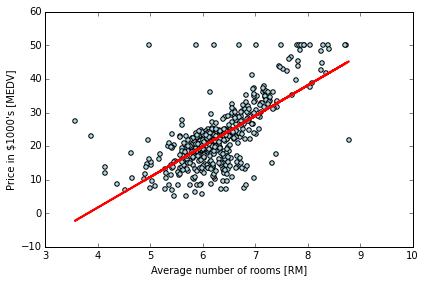

In [53]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()
#plt.savefig('scikit_lr_fit.png', dpi=300)

In [54]:
slr.predict(7.75)

array([ 35.87072383])

In [55]:
slr.predict(3.75)

array([-0.5377121])

###### What number of rooms yields $30K?

###### Inverse Interpolation Answer

In [58]:
np.interp(30,y,X[:,0])

6.03

###### What does the simple linear regression model think?

In [59]:
slr.predict(6.03)

array([ 20.21509638])

###### Set up a boolean vector for boolean indexing:

In [60]:
bvec = abs(y-30)==min(abs(y-30))

######  Here's what the data reveals:

In [61]:
y[bvec]

array([ 29.9,  30.1,  30.1,  30.1])

In [62]:
xpredict = X[bvec];print(xpredict)

[[ 6.86 ]
 [ 6.618]
 [ 6.842]
 [ 6.728]]


###### Here's what the model thinks:

In [63]:
slr.predict(np.median(xpredict))

array([ 27.08718866])

In [64]:
slr.predict(np.average(xpredict))

array([ 26.87784015])

In [65]:
slr.predict(0.5*(xpredict.min()+xpredict.max()))  # Midpoint between max and min

array([ 26.66849165])

In [66]:
slr.predict(7.1055) # Guess and check

array([ 30.00441459])